<a href="https://colab.research.google.com/github/MOULIK-RAZDAN/WHATSAPP-CHATS-STATS/blob/main/Whatsapp_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WHATSAPP EXPLORARTRY DATA ANALYSIS**#


In [135]:
data_filename = '/content/drive/MyDrive/projects/whatsapp message (EDA)/WhatsApp Chat with Team Devil.txt'
#contains path to the txt file

#IMPORTING LIBRARIES

In [136]:
!pip install emoji

In [137]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import os
import emoji
import re
import datetime as time
from collections import  Counter
from wordcloud import WordCloud,STOPWORDS

In [138]:
whatsapp_df = pd.read_fwf(data_filename, header = None)
whatsapp_df

,0,1,2,3,4,5,6,7,8,9,10
0,"10/01/2021, 7:26 pm - Messages and calls are e...",can,read,or,listen,to,them.,Tap,to,learn,more.
1,"10/01/2021, 7:26 pm - Omesh Kumar created grou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10/01/2021, 7:26 pm - Omesh Kumar added you",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"10/01/2021, 7:26 pm - Omesh Kumar: Guys from n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"10/01/2021, 7:26 pm - Omesh Kumar: I can trust...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11902,"01/06/2021, 10:14 pm - Sandeep: <Media omitted>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11903,"02/06/2021, 12:36 pm - Omesh Kumar: <Media omi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11904,"02/06/2021, 12:39 pm - +91 77340 02221: lagta ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11905,"02/06/2021, 12:39 pm - +91 77340 02221: 😢",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11907 entries, 0 to 11906
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11705 non-null  object
 1   1       135 non-null    object
 2   2       115 non-null    object
 3   3       101 non-null    object
 4   4       88 non-null     object
 5   5       66 non-null     object
 6   6       66 non-null     object
 7   7       59 non-null     object
 8   8       54 non-null     object
 9   9       51 non-null     object
 10  10      48 non-null     object
dtypes: object(11)
memory usage: 1023.4+ KB


##Converting chat log to a dataframe


In [140]:
def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    user     = []; 
    message  = []; 
    datetime = []
    
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf('/content/drive/MyDrive/projects/whatsapp message (EDA)/WhatsApp Chat with Team Devil.txt')

#MAKING COPIES OF DATAFRAME

In [141]:
whatsapp_df1 = whatsapp_df.copy();
whatsapp_df2 = whatsapp_df.copy();
whatsapp_df3= whatsapp_df.copy();
whatsapp_df4 = whatsapp_df.copy();
whatsapp_df5 = whatsapp_df.copy();
whatsapp_df6 = whatsapp_df.copy();
whatsapp_df7 = whatsapp_df.copy();

In [142]:
whatsapp_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  11054 non-null  datetime64[ns]
 1   user      11054 non-null  object        
 2   message   11054 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 259.2+ KB


#Question 1 : User with maximum number of messages in the group?
---

In [143]:
whatsapp_df1 = whatsapp_df.copy();
whatsapp_df1["Number_of_Messages"] = [1]* whatsapp_df1.shape[0]
#whatsapp_df1.drop(columns=["datetime", "message"], inplace= True)
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_Messages'].count().sort_values(ascending = False).reset_index() 


#whatsapp_df1 = whatsapp_df1.groupby('user').count().sort_values(by =['Number_of_Messages'], ascending = False )


##DATA VISUALIZATION

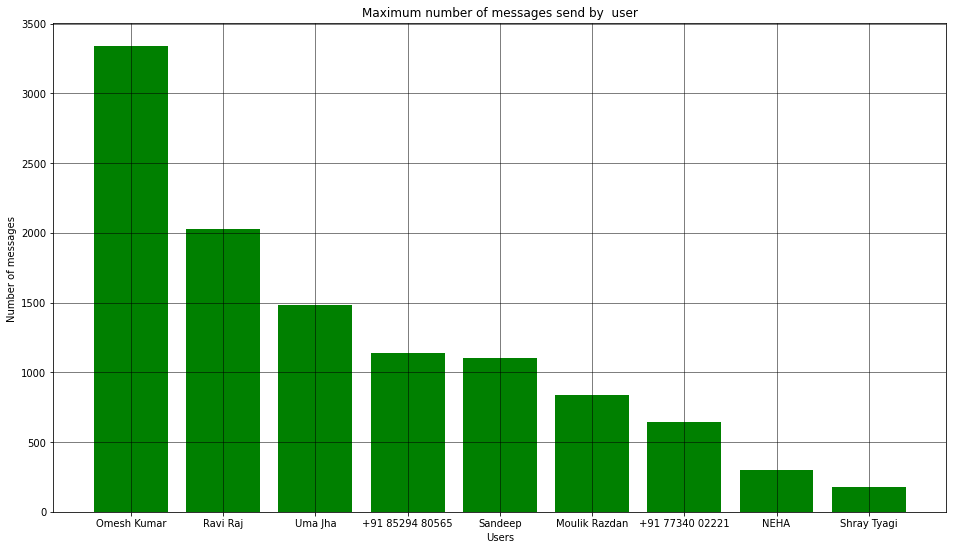

In [144]:
#sns.set_style("darkgrid")

plt.figure(figsize = (16,9))

plt.bar(whatsapp_df1.user, whatsapp_df1.Number_of_Messages, color= 'g')
plt.xlabel("Users")
plt.ylabel("Number of messages ")
plt.title("Maximum number of messages send by  user")
plt.grid(linewidth = 0.5,color = "black");

In [145]:
fig = px.pie(whatsapp_df1, values="Number_of_Messages", names="user", title = "Maximum number of messages send by  user")
fig

#Question 2 : Most active hour in the group?
---

In [146]:
whatsapp_df2 = whatsapp_df.copy();

In [147]:

whatsapp_df2["Number_of_Messages"] = [1] * whatsapp_df2.shape[0]
#whatsapp_df2 = whatsapp_df2.drop(columns=['datetime', 'user', 'message'], inplace= True)

whatsapp_df2["hours"] = whatsapp_df2["datetime"].apply(lambda x: x.hour)
#whatsapp_df2 = whatsapp_df2.drop(['datetime', 'user', 'message'],axis=1, inplace= True)
time_df = whatsapp_df2.groupby('hours').count().sort_values(by = "hours").reset_index()

time_df.drop(['user','datetime','message'], axis=1,inplace= True)
time_df

,hours,Number_of_Messages
0,0,600
1,1,193
2,2,1
3,3,1
4,5,3
5,6,13
6,7,10
7,8,61
8,9,441
9,10,438


##DATA VISUALIZATION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



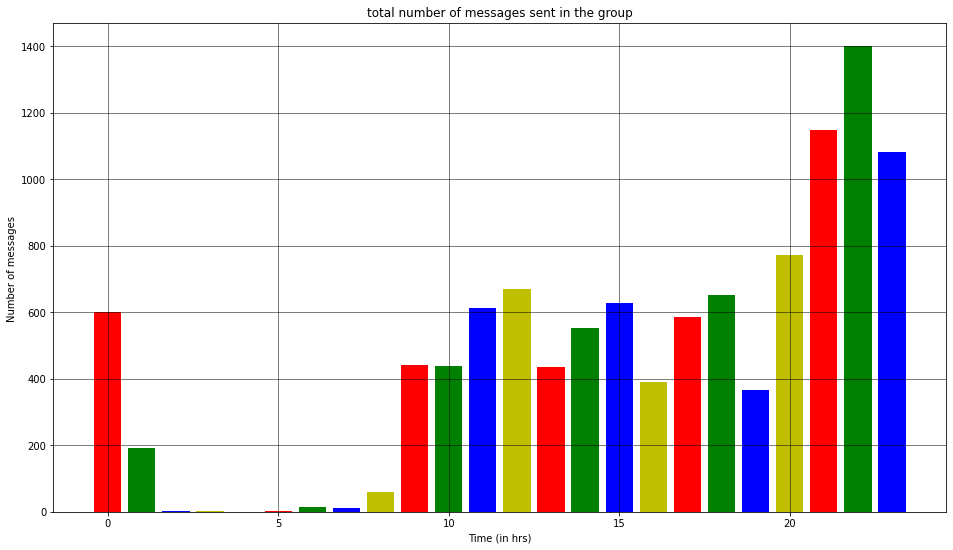

In [148]:
plt.figure(figsize = (16,9))

plt.bar(time_df.hours, time_df.Number_of_Messages, color= 'rgby')
plt.xlabel("Time (in hrs)")
plt.ylabel("Number of messages ")
plt.title("total number of messages sent in the group")
plt.grid(linewidth = 0.5,color = "black");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



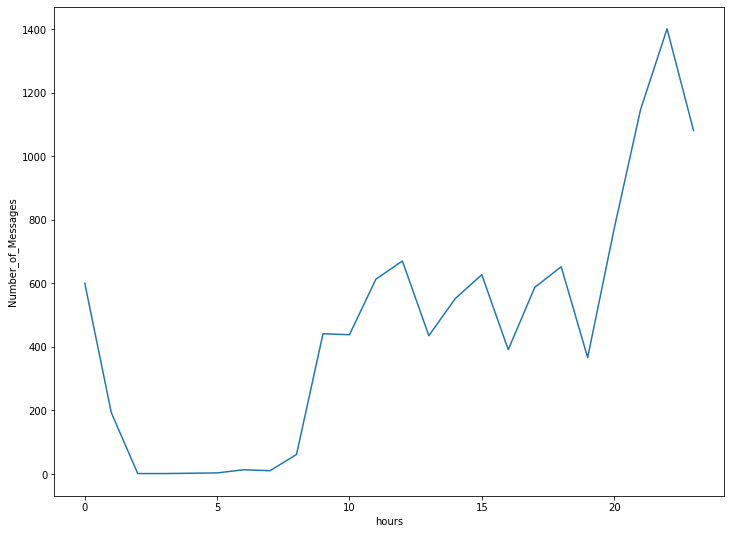

In [149]:
plt.figure(figsize = (12,9))

sns.lineplot(time_df.hours, time_df.Number_of_Messages,data = time_df );

#Question 3 : Most busiest month of the group?
---

In [150]:
whatsapp_df3 = whatsapp_df.copy();

In [151]:
whatsapp_df3["Number_of_Messages"] = [1] * whatsapp_df3.shape[0]
whatsapp_df3["Months"] = whatsapp_df3["datetime"].apply(lambda x: x.month)

time_df = whatsapp_df3.groupby('Months').count().sort_values(by = "Months").reset_index()

time_df.drop(['user','datetime','message'], axis=1,inplace= True)
time_df

,Months,Number_of_Messages
0,1,4541
1,2,2998
2,3,1449
3,4,1100
4,5,793
5,6,173


##DATA VISUALIZATION


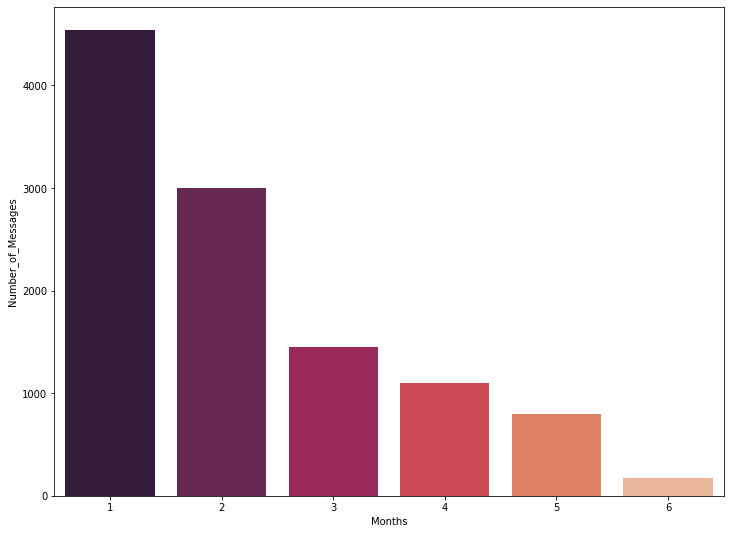

In [152]:
plt.figure(figsize=(12,9))
sns.barplot(x= "Months", y = "Number_of_Messages", data = time_df, palette= sns.color_palette('rocket', 6));

#Question 4 : Average message length by each user?

---




In [153]:
whatsapp_df4 = whatsapp_df.copy();

In [154]:
whatsapp_df4['message_length'] = whatsapp_df4['message'].apply(lambda x: len(x))
msg_length_df = whatsapp_df4.groupby('user').mean().sort_values(by = 'message_length', ascending = False).reset_index()

In [155]:
msg_length_df

,user,message_length
0,Ravi Raj,26.672431
1,Sandeep,24.175566
2,+91 77340 02221,23.803406
3,+91 85294 80565,23.437885
4,Moulik Razdan,22.854415
5,Shray Tyagi,21.661111
6,Omesh Kumar,19.601497
7,NEHA,16.053156
8,Uma Jha,15.335354


#DATA VISUALIZATION

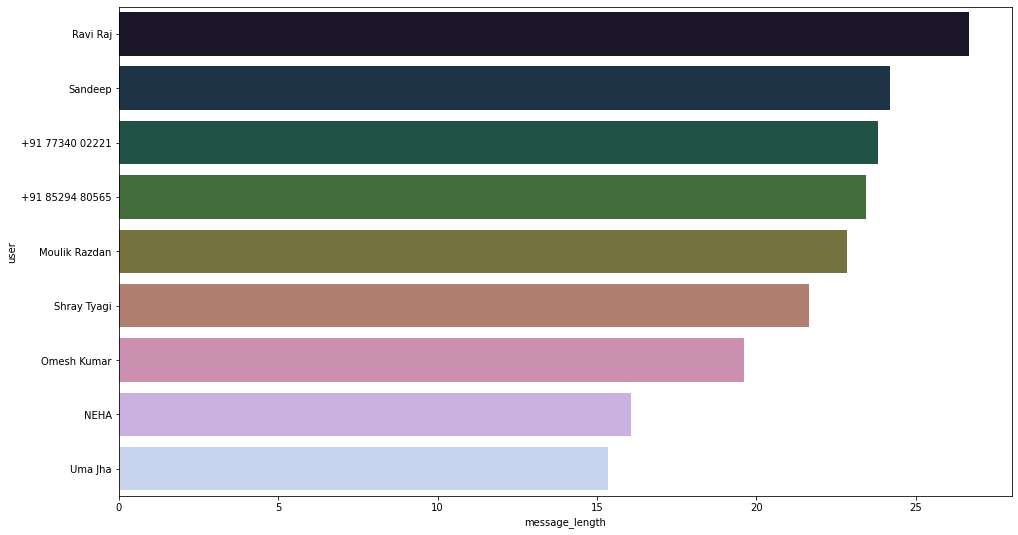

In [156]:
plt.figure(figsize=(16,9))
sns.barplot(y= "user", x = "message_length", data = msg_length_df, palette=sns.color_palette('cubehelix',10));

#Question 5 : Most used emojis in the group?
----

In [163]:
whatsapp_df4 = whatsapp_df.copy();


In [165]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df4.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [166]:
emojis_df = pd.DataFrame()

In [172]:
emojis_df['emoji'] = [''] * 10
emojis_df['Number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_ctr(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.Number_of_Emoji[i] = int(item[1])
  
    i += 1

TypeError: ignored

In [170]:
emojis_df

,emoji,Number_of_Emoji
0,it,2564
1,es,781
2,en,759
3,pt,164
4,,0
5,,0
6,,0
7,,0
8,,0
9,,0


In [169]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

it - 2564
es - 781
en - 759
pt - 164
